In [1]:
import os
import wget
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import scipy as sp
import seaborn as sns
import glob
from pandas.tools.plotting import scatter_matrix
sns.set()
sns.set_color_codes()
%matplotlib inline

In [2]:
def merge_fitness_files(folder_path):
    """
    Cleans and processes multiple .csv of daily Google Fit data files
    Creates new merged .csv file
    folder_path: string of file folder with .csv of Google Fit data files
    """
    current_dir = os.getcwd()
    os.chdir(folder_path)
    try:
        os.rename("Daily Summaries.csv", "Daily Summaries.tsv")
    except OSError:
        pass
    
    files = [f for f in os.listdir('.') if os.path.isfile(f)]
    sorted_files = sorted(files)
    start_date = sorted_files[0][:10]
    end_date = sorted_files[-2][:10]
    output_filename = ("merged_fitness_data-%s_to_%s.csv" % (start_date, end_date))
   
    df_list = []
    for input_file in glob.glob(os.path.join(folder_path, '*.csv')):
        df = pd.read_csv(input_file)
        file_date = input_file.split("Daily Aggregations/")[1][:10]
        df = pd.read_csv(input_file)
        df['Day'] = file_date
        df['day_start_time']=df['Day']+" "+df['Start time'].str.replace(".000-07:00","")
        df['day_end_time']=df['Day']+" "+df['Start time'].str.replace(".000-07:00","")
        df_list.append(df)
    joined_data = pd.concat(df_list)
    if not os.path.exists('merged_data'):
        os.makedirs('merged_data')
    try:
        joined_data.to_csv("merged_data/%s" % output_filename, index=False)
    except OSError:
        pass
    
    os.chdir(current_dir)
    


In [3]:
merge_fitness_files("/Users/kivan/repos/fitness-atlas/Takeout/Fit/Daily Aggregations/")

In [4]:
#merged_data = pd.read_csv("../Takeout/Fit/Daily Aggregations/merged_data/merged_fitness_data-2014-04-14_to_2016-10-02.csv")

In [5]:
merged_data = pd.read_csv("../Takeout/Fit/Daily Aggregations/merged_data/merged_fitness_data-2014-04-14_to_2016-10-02.csv",
                         parse_dates=['day_start_time', 'day_end_time'],
                          infer_datetime_format=True)

In [6]:
print(merged_data.shape)
merged_data.head()

(38016, 26)


,Average heart rate (bpm),Average speed (m/s),Average weight (kg),Biking duration (ms),Calories (kcal),Day,Distance (m),End time,High latitude (deg),High longitude (deg),...,Min heart rate (bpm),Min speed (m/s),Min weight (kg),Other duration (ms),Running duration (ms),Start time,Step count,Walking duration (ms),day_end_time,day_start_time
0,NaN,NaN,NaN,NaN,NaN,2014-04-14,NaN,00:15:00.000-07:00,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,00:00:00.000-07:00,NaN,NaN,2014-04-14 00:00:00,2014-04-14 00:00:00
1,NaN,NaN,NaN,NaN,NaN,2014-04-14,NaN,00:30:00.000-07:00,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,00:15:00.000-07:00,NaN,NaN,2014-04-14 00:15:00,2014-04-14 00:15:00
2,NaN,NaN,NaN,NaN,NaN,2014-04-14,NaN,00:45:00.000-07:00,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,00:30:00.000-07:00,NaN,NaN,2014-04-14 00:30:00,2014-04-14 00:30:00
3,NaN,NaN,NaN,NaN,NaN,2014-04-14,NaN,01:00:00.000-07:00,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,00:45:00.000-07:00,NaN,NaN,2014-04-14 00:45:00,2014-04-14 00:45:00
4,NaN,NaN,NaN,NaN,NaN,2014-04-14,NaN,01:15:00.000-07:00,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,01:00:00.000-07:00,NaN,NaN,2014-04-14 01:00:00,2014-04-14 01:00:00


In [7]:
merged_data.columns

Index(['Average heart rate (bpm)', 'Average speed (m/s)',
       'Average weight (kg)', 'Biking duration (ms)', 'Calories (kcal)', 'Day',
       'Distance (m)', 'End time', 'High latitude (deg)',
       'High longitude (deg)', 'Inactive duration (ms)', 'Low latitude (deg)',
       'Low longitude (deg)', 'Max heart rate (bpm)', 'Max speed (m/s)',
       'Max weight (kg)', 'Min heart rate (bpm)', 'Min speed (m/s)',
       'Min weight (kg)', 'Other duration (ms)', 'Running duration (ms)',
       'Start time', 'Step count', 'Walking duration (ms)', 'day_end_time',
       'day_start_time'],
      dtype='object')

In [8]:
merged_data = merged_data[np.isfinite(merged_data['Calories (kcal)'])]
print(merged_data.shape)

(27702, 26)


In [9]:
merged_data['Day'].describe()

count          27702
unique           300
top       2015-11-01
freq             100
Name: Day, dtype: object

In [10]:
merged_data['Calories (kcal)'].describe()

count    27702.000000
mean        18.655521
std         17.134214
min          0.109525
25%         16.028048
50%         16.028048
75%         16.028048
max        234.661148
Name: Calories (kcal), dtype: float64

In [11]:
# Find the start date
ind = pd.DatetimeIndex(merged_data.day_start_time)
merged_data['date'] = ind.date.astype('datetime64')
merged_data['hour'] = ind.hour

In [12]:
# Count trips by date
by_date = merged_data.pivot_table('Calories (kcal)', aggfunc='sum',
                            index='date',
                            #columns='', 
                            )

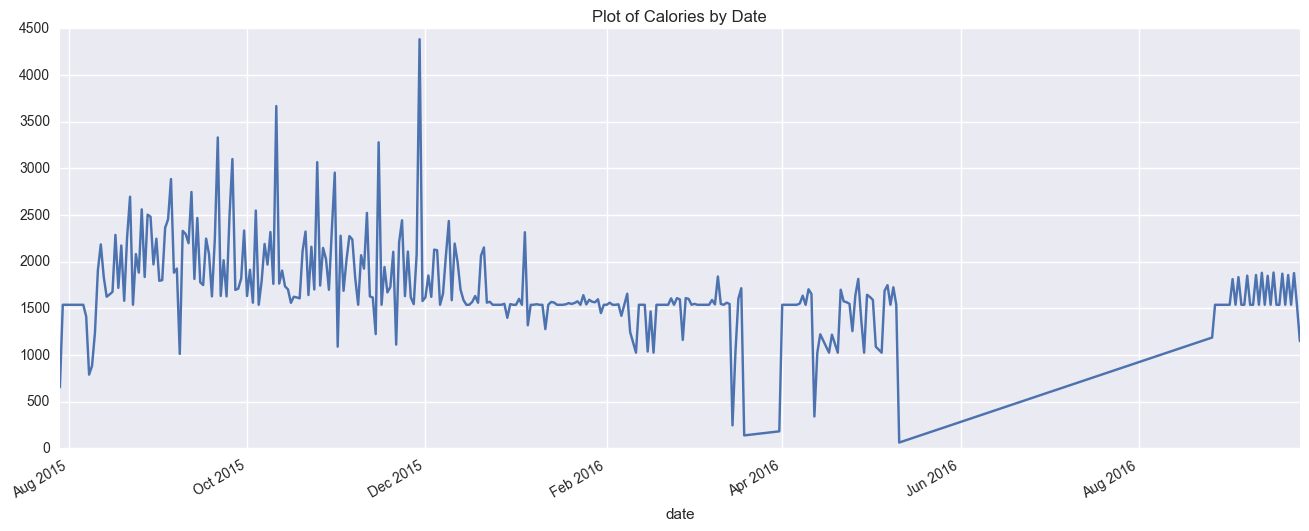

In [13]:
fig, ax = plt.subplots(figsize=(16, 6))
fig.subplots_adjust(hspace=0.4)
by_date.iloc[:,].plot(ax=ax, title='Plot of Calories by Date')

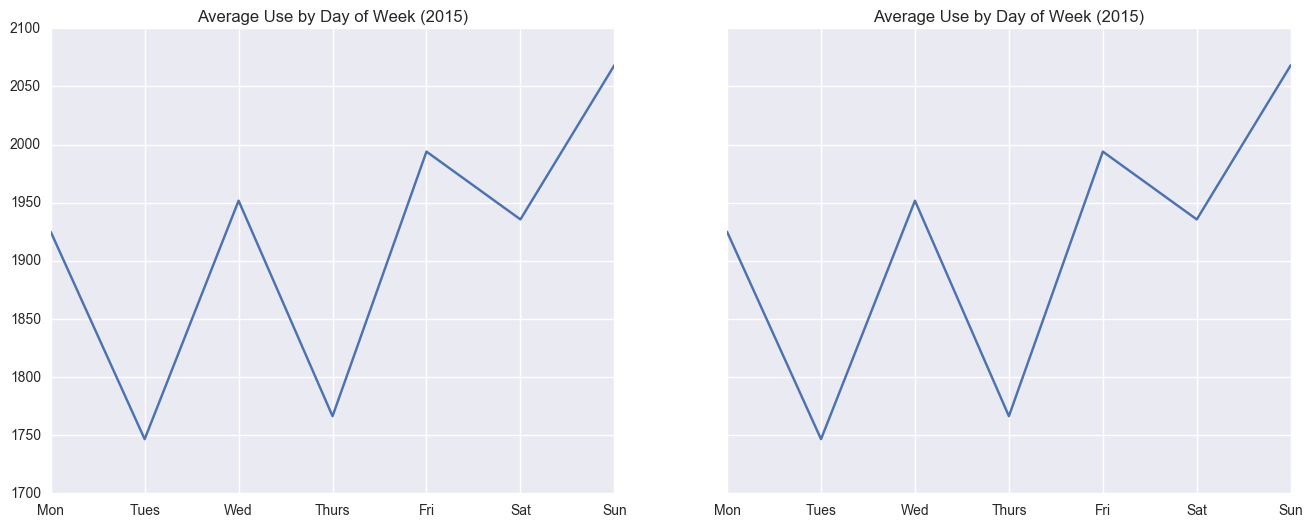

In [14]:
by_weekday = by_date.groupby([by_date.index.year,
                              by_date.index.dayofweek]).mean()
#by_weekday.columns.name = None  # remove label for plot

fig, ax = plt.subplots(1, 2, figsize=(16, 6), sharey=True)
by_weekday.loc[2015].plot(title='Average Use by Day of Week (2015)', ax=ax[0]);
by_weekday.loc[2015].plot(title='Average Use by Day of Week (2015)', ax=ax[1]);
for axi in ax:
    axi.set_xticklabels(['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun'])

In [15]:
# count trips by date and by hour
by_hour = merged_data.pivot_table('Calories (kcal)', aggfunc='sum',
                            index=['date', 'hour'],#columns='usertype'
                            ).fillna(0).reset_index('hour')

# average these counts by weekend
by_hour['weekend'] = (by_hour.index.dayofweek >= 5)
by_hour = by_hour.groupby(['weekend', 'hour']).mean()
by_hour.index.set_levels([['weekday', 'weekend'],
                          ["{0}:00".format(i) for i in range(24)]],
                         inplace=True);
#by_hour.columns.name = None

In [16]:
merged_data["hour"].describe()

count    27702.000000
mean        11.578225
std          6.894152
min          0.000000
25%          6.000000
50%         12.000000
75%         18.000000
max         23.000000
Name: hour, dtype: float64

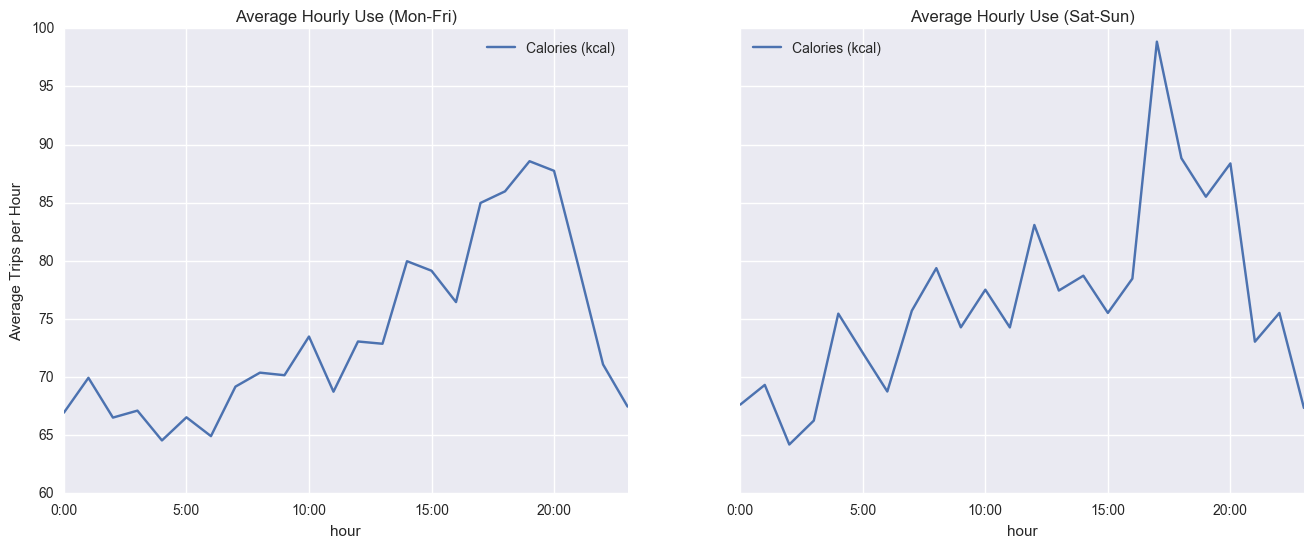

In [17]:
fig, ax = plt.subplots(1, 2, figsize=(16, 6), sharey=True)
by_hour.loc['weekday'].plot(title='Average Hourly Use (Mon-Fri)', ax=ax[0])
by_hour.loc['weekend'].plot(title='Average Hourly Use (Sat-Sun)', ax=ax[1])
ax[0].set_ylabel('Average Trips per Hour');

In [18]:
os.getcwd()

'/Users/kivan/repos/fitness-atlas/notebooks'

In [19]:
#os.chdir("../../../notebooks/")
#os.chdir("../Takeout/Fit/Daily Aggregations/")

In [20]:
if not os.path.isfile("2015_weather_data.csv"):
    wget.download("https://raw.githubusercontent.com/tfliss/pronto-data-2015/master/Pronto_Challenge/2015_weather_data.csv",
              "2015_weather_data.csv")

In [21]:
weather = pd.read_csv('2015_weather_data.csv', index_col='Date', parse_dates=True)
weather.columns

Index(['Max_Temperature_F', 'Mean_Temperature_F', 'Min_TemperatureF',
       'Max_Dew_Point_F', 'MeanDew_Point_F', 'Min_Dewpoint_F', 'Max_Humidity',
       'Mean_Humidity ', 'Min_Humidity ', 'Max_Sea_Level_Pressure_In ',
       'Mean_Sea_Level_Pressure_In ', 'Min_Sea_Level_Pressure_In ',
       'Max_Visibility_Miles ', 'Mean_Visibility_Miles ',
       'Min_Visibility_Miles ', 'Max_Wind_Speed_MPH ', 'Mean_Wind_Speed_MPH ',
       'Max_Gust_Speed_MPH', 'Precipitation_In ', 'Events'],
      dtype='object')

In [22]:
by_date = merged_data.groupby(['date'])['Calories (kcal)'].sum()
#by_date.name = 'count'
by_date.rename = 'count'
by_date = by_date.to_frame()
by_date = by_date.join(weather)

In [23]:
by_date.columns

Index(['Calories (kcal)', 'Max_Temperature_F', 'Mean_Temperature_F',
       'Min_TemperatureF', 'Max_Dew_Point_F', 'MeanDew_Point_F',
       'Min_Dewpoint_F', 'Max_Humidity', 'Mean_Humidity ', 'Min_Humidity ',
       'Max_Sea_Level_Pressure_In ', 'Mean_Sea_Level_Pressure_In ',
       'Min_Sea_Level_Pressure_In ', 'Max_Visibility_Miles ',
       'Mean_Visibility_Miles ', 'Min_Visibility_Miles ',
       'Max_Wind_Speed_MPH ', 'Mean_Wind_Speed_MPH ', 'Max_Gust_Speed_MPH',
       'Precipitation_In ', 'Events'],
      dtype='object')

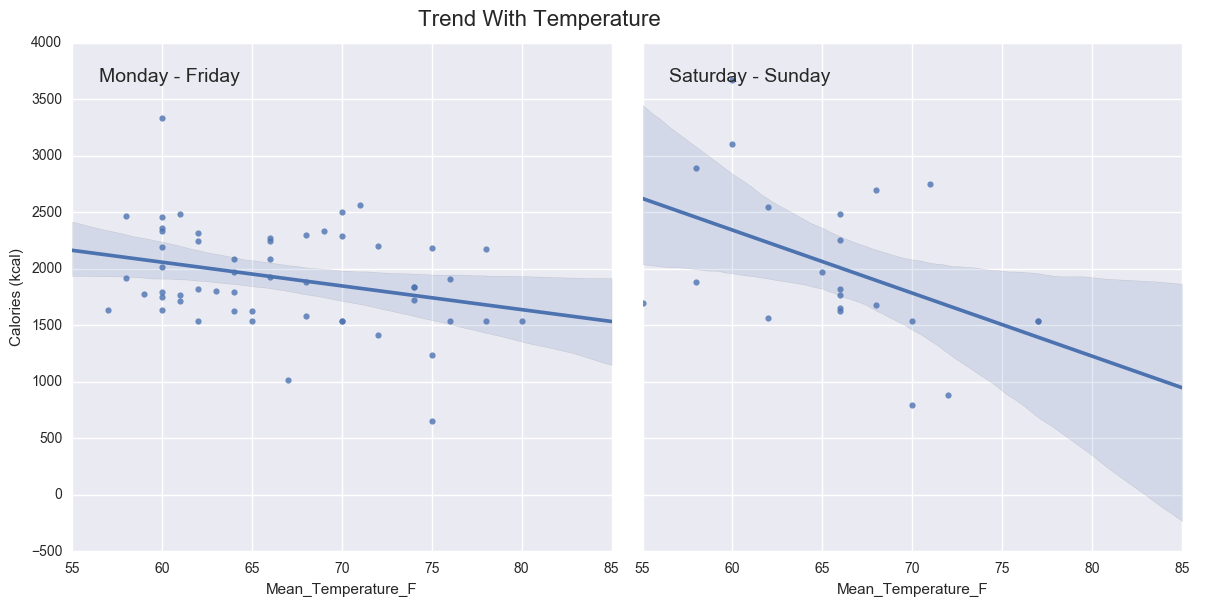

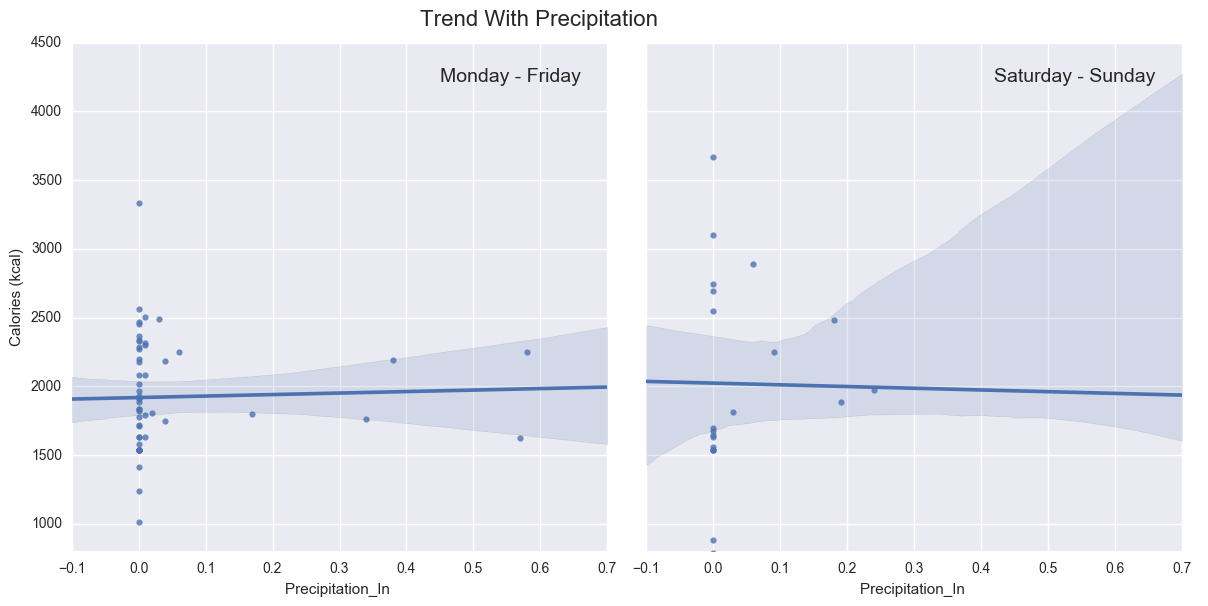

In [24]:
# add a flag indicating weekend
by_date['weekend'] = (by_date.index.dayofweek >= 5)

#----------------------------------------------------------------
# Plot Temperature Trend
g = sns.FacetGrid(by_date, col="weekend", size=6)
g.map(sns.regplot, "Mean_Temperature_F", "Calories (kcal)")
g.add_legend();

# do some formatting
g.axes[0, 0].set_title('')
g.axes[0, 1].set_title('')
g.axes[0, 0].text(0.05, 0.95, 'Monday - Friday', va='top', size=14,
                  transform=g.axes[0, 0].transAxes)
g.axes[0, 1].text(0.05, 0.95, 'Saturday - Sunday', va='top', size=14,
                  transform=g.axes[0, 1].transAxes)
g.fig.text(0.45, 1, "Trend With Temperature", ha='center', va='top', size=16);

#----------------------------------------------------------------
# Plot Precipitation
g = sns.FacetGrid(by_date, col="weekend", size=6)
g.map(sns.regplot, "Precipitation_In ", "Calories (kcal)")
g.add_legend();

# do some formatting
g.axes[0, 0].set_ylim(800, 4500);
g.axes[0, 0].set_title('')
g.axes[0, 1].set_title('')
g.axes[0, 0].text(0.95, 0.95, 'Monday - Friday', ha='right', va='top', size=14,
                  transform=g.axes[0, 0].transAxes)
g.axes[0, 1].text(0.95, 0.95, 'Saturday - Sunday', ha='right', va='top', size=14,
                  transform=g.axes[0, 1].transAxes)
g.fig.text(0.45, 1, "Trend With Precipitation", ha='center', va='top', size=16);
